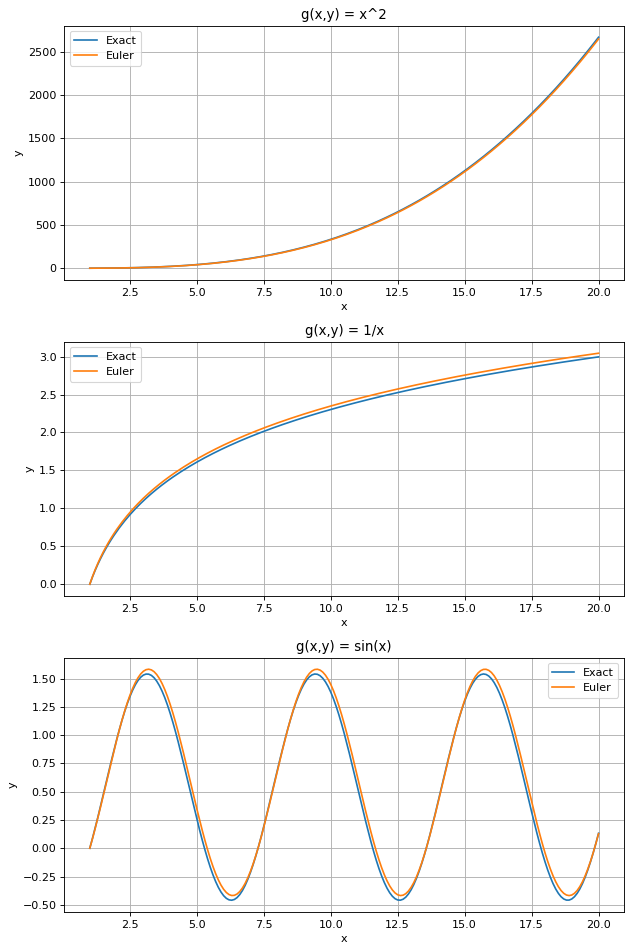

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the example functions as g1, g2, g3
def g1(x, y):
    return x**2

def g2(x, y):
    return 1/x

def g3(x, y):
    return np.sin(x)

# Define the Euler method for solving ODEs
def euler(g, x0, xf, y0, dx):
    """
    This function utilizes the Euler method for solving ODEs.
    Inputs:
        g: A function representing the ODE (dy/dx = g(x, y))
        x0 (float): Initial x-coordinate 
        xf (float): Final x-coordinate 
        y0 (float): Initial y-coordinate 
        dx (float): Integration time step 
    Outputs:
        x: x-coordinates of the numerical solution
        y: y-coordinates of the numerical solution
    """   
    x = np.arange(x0, xf+dx, dx)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(1, len(x)):
        y[i] = y[i-1] + dx * g(x[i-1], y[i-1])
    return x, y

# Set up parameters for the numerical solutions
dx = 0.1
xf = 20

# Initial conditions and analytical solutions for g1
x0 = 1.0
y0 = 0
x = np.arange(x0, xf+dx, dx)
y_exactg1 = y0 + 1/3 * x**3

# Initial conditions and analytical solutions for g2
x0 = 1.0
y0 = 0
x = np.arange(x0, xf+dx, dx)
y_exactg2 = y0 - np.log(x0) + np.log(x)

# Initial conditions and analytical solutions for g3
x0 = 1.0
y0 = 0
x = np.arange(x0, xf+dx, dx)
y_exactg3 = y0 - np.cos(x) + np.cos(x0)

# Calculate numerical solutions using the Euler method
x_eulerg1, y_eulerg1 = euler(g1, x0, xf, y0, dx)
x_eulerg2, y_eulerg2 = euler(g2, x0, xf, y0, dx)
x_eulerg3, y_eulerg3 = euler(g3, x0, xf, y0, dx)

# Create subplots to compare the exact and Euler solutions
fig, axs = plt.subplots(3, 1, figsize=(8, 12), dpi=80)
axs[0].plot(x, y_exactg1, label='Exact')
axs[0].plot(x_eulerg1, y_eulerg1, label='Euler')
axs[0].set_title('g(x,y) = x^2')
axs[0].legend()

axs[1].plot(x, y_exactg2, label='Exact')
axs[1].plot(x_eulerg2, y_eulerg2, label='Euler')
axs[1].set_title('g(x,y) = 1/x')
axs[1].legend()

axs[2].plot(x, y_exactg3, label='Exact')
axs[2].plot(x_eulerg3, y_eulerg3, label='Euler')
axs[2].set_title('g(x,y) = sin(x)')
axs[2].legend()

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
    ax.grid(True)

plt.tight_layout()
plt.show()